# Named Entity Recognition using BERT-base-cased model 



*   Named entity recognition (NER)is probably the first step towards information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.
*  NER is used in many fields in Natural Language Processing (NLP), and it can help answering many real-world questions

# Dataset



1.   CoNLL-2003 is a named entity recognition dataset released as a part of CoNLL-2003 shared task: language-independent named entity recognition.
2.   The CoNLL-2003 data files contain four columns separated by a single space. Each word has been put on a separate line and there is an empty line after each sentence. The first item on each line is a word, the second a part-of-speech (POS) tag, the third a syntactic chunk tag and the fourth the named entity tag.



# Implementation

Installing required packages


1.   datasets -> A lightweight library providing two main features: 

*   one-line dataloaders for many public datasets
*   efficient data pre-processing


2.   seqeval -> A Python framework for sequence labeling evaluation. seqeval can evaluate the performance of chunking tasks such as named-entity recognition, part-of-speech tagging, semantic role labeling and so on.


3.   Transformers provides APIs to easily download and train state-of-the-art pretrained models. Using pretrained models can reduce your compute costs, carbon footprint, and save you time from training a model from scratch. The models can be used across different modalities such as: text, image, audio, multi-modal 






In [1]:
pip install datasets seqeval transformers==4.12.5

     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 3.1 MB 33.3 MB/s 
     |████████████████████████████████| 596 kB 46.9 MB/s 
     |████████████████████████████████| 3.3 MB 36.4 MB/s 
     |████████████████████████████████| 895 kB 43.7 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 1.1 MB 38.3 MB/s 
     |████████████████████████████████| 136 kB 49.4 MB/s 
     |████████████████████████████████| 212 kB 45.7 MB/s 
     |████████████████████████████████| 127 kB 51.7 MB/s 
     |████████████████████████████████| 271 kB 50.4 MB/s 
     |████████████████████████████████| 144 kB 53.1 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=f2926da74dbe4e389ca36f1eede0db7b3e894b92ed5edbd87d02afac4ebe39b9
  Stored in directory: /root/.cache/pip/whe

In [2]:
from datasets import load_dataset


In [3]:
raw_dataset = load_dataset("conll2003")

Generating train split:   0%|          | 0/14042 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3251 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3454 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/63f4ebd1bcb7148b1644497336fd74643d4ce70123334431a3c053b7ee4e96ee. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
raw_dataset #gives the schema of the dataset dictionary

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14042
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3251
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3454
    })
})

In [5]:
print(raw_dataset["train"][0]["tokens"])
print(raw_dataset["train"][0]["ner_tags"])

['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']
[3, 0, 7, 0, 0, 0, 7, 0, 0]


In [6]:
dataset_feature = raw_dataset["train"].features
print(dataset_feature)

{'id': Value(dtype='string', id=None), 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=ClassLabel(num_classes=47, names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None), 'chunk_tags': Sequence(feature=ClassLabel(num_classes=23, names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None), 'ner_tags': Sequence(feature=ClassLabel(num_classes=9, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}


In [7]:
print(dataset_feature["ner_tags"]) #to identify the class of the entity (inclusive of IOB tagging)

Sequence(feature=ClassLabel(num_classes=9, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)


In [8]:
ner_labels = dataset_feature["ner_tags"].feature.names
print(ner_labels)    # all NER labels

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


In [9]:
id2label = {str(i): label for i, label in enumerate(ner_labels)}
label2id = {value: key for key, value in id2label.items()}

In [10]:
model_checkpoint = "bert-base-cased"

Importing Tokenizer : This is a generic tokenizer class that will be instantiated as one of the tokenizer classes of the library when created with the AutoTokenizer.from_pretrained() class method

In [11]:
from transformers import AutoTokenizer 

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint) #AutoClasses automatically retrieve the relevant model given the name/path to the pretrained weights/config/vocabulary.

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [13]:
sample_input = tokenizer(raw_dataset["train"][0]["tokens"], is_split_into_words=True)

[CLS] means the start of a sentence and [SEP] makes BERT know the second sentence has begun.

In [14]:
print(sample_input.tokens())
print(sample_input.word_ids())

['[CLS]', 'EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'la', '##mb', '.', '[SEP]']
[None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]


In [15]:
print(raw_dataset["train"][0]["ner_tags"])

[3, 0, 7, 0, 0, 0, 7, 0, 0]


In [16]:
def align_labels_and_tokens(word_ids, labels):
    
    """ Aligns tokens and their respective labels
    
    Args:
        word_ids (list): word ids of tokens after subword tokenization.
        labels (list): original labels irrespective of subword tokenization.
        
    Returns:
        updated_labels (list): labels aligned with respective tokens. 
    
    """
    
    updated_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            current_word = word_id
            updated_labels.append(-100 if word_id is None else labels[word_id])   
        elif word_id is None:
            updated_labels.append(-100)
        else:
            label = labels[word_id]
            # B-XXX to I-XXX for subwords (Inner entities)
            if label % 2 == 1:
                label+=1
            updated_labels.append(label)
    return updated_labels

In [17]:
sample_labels = raw_dataset["train"][0]["ner_tags"]
print(sample_labels)
print(align_labels_and_tokens(sample_input.word_ids(), sample_labels))

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]


In [18]:
def tokenize_and_align_labels(dataset):
    
    """ Performs tokenization and aligns all tokens and labels
        in the dataset.
    
    Args:
        dataset (DatasetDict): dataset containing tokens and labels.
    
    Returns:
        tokenized_data (dict): contains input_ids, attention_mask, token_type_ids, labels
        
    """
    
    tokenized_data = tokenizer(dataset["tokens"], truncation=True, is_split_into_words=True)
    all_labels = dataset["ner_tags"]
    updated_labels = []
    for i, labels in enumerate(all_labels):
        updated_labels.append(align_labels_and_tokens(tokenized_data.word_ids(i), labels))
    tokenized_data["labels"] = updated_labels
    return tokenized_data

In [19]:
tokenize_and_align_labels(raw_dataset['train'][:5])

{'input_ids': [[101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102], [101, 1943, 14428, 102], [101, 26660, 13329, 12649, 15928, 1820, 118, 4775, 118, 1659, 102], [101, 1109, 1735, 2827, 1163, 1113, 9170, 1122, 19786, 1114, 1528, 5566, 1106, 11060, 1106, 188, 17315, 1418, 2495, 12913, 1235, 6479, 4959, 2480, 6340, 13991, 3653, 1169, 1129, 12086, 1106, 8892, 119, 102], [101, 1860, 112, 188, 4702, 1106, 1103, 1735, 1913, 112, 188, 27431, 3914, 14651, 163, 7635, 4119, 1163, 1113, 9031, 11060, 1431, 4417, 8892, 3263, 2980, 1121, 2182, 1168, 1190, 2855, 1235, 1103, 3812, 5566, 1108, 27830, 119, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [20]:
tokenized_dataset = raw_dataset.map(
    tokenize_and_align_labels,
    batched = True,
    remove_columns = raw_dataset["train"].column_names
)

  0%|          | 0/15 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

Data collators are objects that will form a batch by using a list of dataset elements as input. These elements are of the same type as the elements of train_dataset or eval_dataset.

In [21]:
from transformers import DataCollatorForTokenClassification   

In [22]:
# Data collator pads inputs and labels
data_collator = DataCollatorForTokenClassification(
    tokenizer = tokenizer
)

Importing model :

In [23]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint, 
    num_labels=len(ner_labels),
    id2label = id2label,
    label2id = label2id
)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [24]:
# Specifying training arguments

batch_size = 32

args = TrainingArguments(
    model_checkpoint,
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01
)

In [25]:
from datasets import load_metric
import numpy as np

In [26]:
# Loading helper function to compute metrics
metric = load_metric("seqeval")

In [27]:
def compute_metrics(p):
    
    """ Computes and returns metrics during training.
    
    Args:
        p (tuple): tuple containing predictions, labels as lists.
    
    Returns:
        dict: Dictionary containing precision, recall, f1 score, accuracy. 
    
    """
    
    predictions, labels = p 
    predictions = np.argmax(predictions, axis=2)
    true_predictions = [
        [ner_labels[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [ner_labels[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    metrics = metric.compute(predictions=true_predictions, references=true_labels)
    
    return {
        "precision": metrics["overall_precision"],
        "recall": metrics["overall_recall"],
        "f1": metrics["overall_f1"],
        "accuracy": metrics["overall_accuracy"]
    }

Fine-tuning :

In [28]:
trainer = Trainer(
    model,
    args,
    train_dataset = tokenized_dataset["train"],
    eval_dataset = tokenized_dataset["validation"],
    data_collator = data_collator,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

In [29]:
trainer.train()    # Fine-tunes model on downstream task

***** Running training *****
  Num examples = 14042
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1317


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.072757,0.877151,0.918041,0.897130,0.978822
2,0.189700,0.056881,0.910499,0.939919,0.924975,0.984459
3,0.048400,0.056643,0.917253,0.943958,0.930414,0.984915


***** Running Evaluation *****
  Num examples = 3251
  Batch size = 32
Saving model checkpoint to bert-base-cased/checkpoint-500
Configuration saved in bert-base-cased/checkpoint-500/config.json
Model weights saved in bert-base-cased/checkpoint-500/pytorch_model.bin
tokenizer config file saved in bert-base-cased/checkpoint-500/tokenizer_config.json
Special tokens file saved in bert-base-cased/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 3251
  Batch size = 32
Saving model checkpoint to bert-base-cased/checkpoint-1000
Configuration saved in bert-base-cased/checkpoint-1000/config.json
Model weights saved in bert-base-cased/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in bert-base-cased/checkpoint-1000/tokenizer_config.json
Special tokens file saved in bert-base-cased/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 3251
  Batch size = 32


Training completed. Do not forget to share your mode

TrainOutput(global_step=1317, training_loss=0.0981176038899925, metrics={'train_runtime': 927.2784, 'train_samples_per_second': 45.43, 'train_steps_per_second': 1.42, 'total_flos': 1168207202281608.0, 'train_loss': 0.0981176038899925, 'epoch': 3.0})

In [30]:
import pandas as pd
import matplotlib
from IPython.display import display

matplotlib.style.use('seaborn-whitegrid') 

In [31]:
predictions, labels, _ = trainer.predict(tokenized_dataset["test"])
predictions = np.argmax(predictions, axis=2)

true_predictions = [
    [ner_labels[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [ner_labels[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)

***** Running Prediction *****
  Num examples = 3454
  Batch size = 32


In [32]:
results_df = pd.DataFrame({"LOC": results["LOC"], "MISC": results["MISC"], "ORG": results["ORG"], "PER": results["PER"]}).drop("number", axis=0)

In [33]:
display(results_df)

,LOC,MISC,ORG,PER
precision,0.908876,0.681928,0.856078,0.942319
recall,0.920863,0.806268,0.898856,0.959802
f1,0.914830,0.738903,0.876946,0.950980


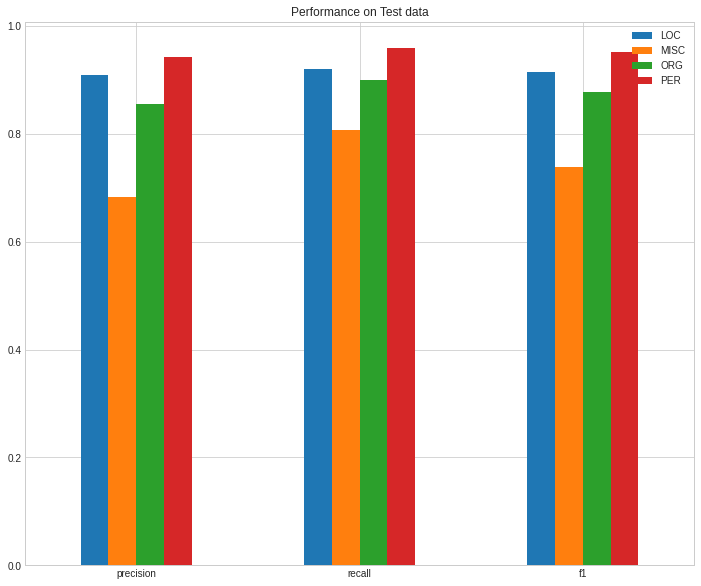

In [34]:
results_df.plot(kind="bar", rot=0, figsize=(12,10))
matplotlib.pyplot.title("Performance on Test data")
matplotlib.pyplot.show()